- trovare un experiment container di interesse
- estrarre esperimento di interesse
- estrarre cellule per l'esperimento scelto
- fluorescence trace per una determinata cellula
- tentativo (non funziona!) di vedere la fluorescenza insieme all'istante dello stimolo

## Experiment Container
Un Experiment Container contiene esperimenti con **uguale** :
- cre_line
- imaging_depth
- targeted_structure

Bisogna definire questi tre per scegliere l'esperimento di interesse

All'interno del container gli esperimenti hanno **diverso**:
- stimolo
- experiment_id, cell_id
- ...

In [1]:
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
import pprint

boc = BrainObservatoryCache(manifest_file='boc/manifest.json')


# Download a list of all targeted areas
targeted_structures = boc.get_all_targeted_structures()
print("all targeted structures: " + str(targeted_structures)+ "\n")
# Download experiment containers for VISp experiments: (targeted_structures=['VISp'])

# Download a list of all imaging depths
depths = boc.get_all_imaging_depths()
print("all imaging depths: " + str(depths) + "\n")

# Download a list of all cre driver lines 
cre_lines = boc.get_all_cre_lines()
print("all cre lines:\n" + str(cre_lines) )

all targeted structures: [u'VISal', u'VISam', u'VISl', u'VISp', u'VISpm', u'VISrl']

all imaging depths: [175, 185, 195, 200, 205, 225, 250, 265, 275, 276, 285, 300, 320, 325, 335, 350, 365, 375, 390, 400, 550, 570, 625]

all cre lines:
[u'Cux2-CreERT2', u'Emx1-IRES-Cre', u'Fezf2-CreER', u'Nr5a1-Cre', u'Ntsr1-Cre_GN220', u'Pvalb-IRES-Cre', u'Rbp4-Cre_KL100', u'Rorb-IRES2-Cre', u'Scnn1a-Tg3-Cre', u'Slc17a7-IRES2-Cre', u'Sst-IRES-Cre', u'Tlx3-Cre_PL56', u'Vip-IRES-Cre']


In [2]:
experiment_containers = boc.get_experiment_containers(targeted_structures=['VISp'],
                                                     imaging_depths=[350]
                                                     )
print("Numero di Experiment Containers con queste tre caratteristiche: %d" % len(experiment_containers))
experiment_containers[0]

Numero di Experiment Containers con queste tre caratteristiche: 15


{'cre_line': u'Scnn1a-Tg3-Cre',
 'donor_name': u'230570',
 'failed': False,
 'id': 511510911,
 'imaging_depth': 350,
 'reporter_line': u'Ai93(TITL-GCaMP6f)',
 'specimen_name': u'Scnn1a-Tg3-Cre;Camk2a-tTA;Ai93-230570',
 'tags': [],
 'targeted_structure': u'VISp'}

## Find Experiment
Scelgo un Experiment Container a caso tra questi. Scelgo il primo: contiene 3 esperimenti

In [3]:
experiment_container_id = experiment_containers[0]['id']
experiments = boc.get_ophys_experiments(experiment_container_ids=[experiment_container_id])

experiments

[{'acquisition_age_days': 85,
  'cre_line': u'Scnn1a-Tg3-Cre',
  'donor_name': u'230570',
  'experiment_container_id': 511510911,
  'fail_eye_tracking': True,
  'id': 508596945,
  'imaging_depth': 350,
  'reporter_line': u'Ai93(TITL-GCaMP6f)',
  'session_type': u'three_session_B',
  'specimen_name': u'Scnn1a-Tg3-Cre;Camk2a-tTA;Ai93-230570',
  'targeted_structure': u'VISp'},
 {'acquisition_age_days': 84,
  'cre_line': u'Scnn1a-Tg3-Cre',
  'donor_name': u'230570',
  'experiment_container_id': 511510911,
  'fail_eye_tracking': True,
  'id': 508356957,
  'imaging_depth': 350,
  'reporter_line': u'Ai93(TITL-GCaMP6f)',
  'session_type': u'three_session_A',
  'specimen_name': u'Scnn1a-Tg3-Cre;Camk2a-tTA;Ai93-230570',
  'targeted_structure': u'VISp'},
 {'acquisition_age_days': 77,
  'cre_line': u'Scnn1a-Tg3-Cre',
  'donor_name': u'230570',
  'experiment_container_id': 511510911,
  'fail_eye_tracking': True,
  'id': 506353473,
  'imaging_depth': 350,
  'reporter_line': u'Ai93(TITL-GCaMP6f)',
  

Scelgo l'esperimento con stimolo: **static gratings**

In [4]:
import allensdk.brain_observatory.stimulus_info as stim_info

# Find the experiment with the static static gratings stimulus
exp = boc.get_ophys_experiments(experiment_container_ids=[experiment_container_id], 
                                stimuli=[stim_info.STATIC_GRATINGS])
print("Experiment with static gratings:")
pprint.pprint(exp)


Experiment with static gratings:
[{'acquisition_age_days': 85,
  'cre_line': u'Scnn1a-Tg3-Cre',
  'donor_name': u'230570',
  'experiment_container_id': 511510911,
  'fail_eye_tracking': True,
  'id': 508596945,
  'imaging_depth': 350,
  'reporter_line': u'Ai93(TITL-GCaMP6f)',
  'session_type': u'three_session_B',
  'specimen_name': u'Scnn1a-Tg3-Cre;Camk2a-tTA;Ai93-230570',
  'targeted_structure': u'VISp'}]


## Download experiment
Download the NWB file for this experiment.

In [5]:
experiment = boc.get_ophys_experiment_data(exp[0]['id']) 

# print out the metadata available in the NWB file
pprint.pprint(experiment.get_metadata())

print("\n stimuli available in this file:")
print(experiment.list_stimuli())

{'age_days': 86,
 'cre_line': u'Scnn1a-Tg3-Cre/wt',
 'device': u'Nikon A1R-MP multiphoton microscope',
 'device_name': u'CAM2P.2',
 'excitation_lambda': u'910 nanometers',
 'experiment_container_id': 511510911,
 'fov': u'400x400 microns (512 x 512 pixels)',
 'genotype': u'Scnn1a-Tg3-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-GCaMP6f)/Ai93(TITL-GCaMP6f)',
 'imaging_depth_um': 350,
 'indicator': u'GCaMP6f',
 'ophys_experiment_id': 508596945,
 'pipeline_version': u'3.0',
 'session_start_time': datetime.datetime(2016, 3, 17, 15, 5, 33),
 'session_type': u'three_session_B',
 'sex': u'female',
 'specimen_name': u'Scnn1a-Tg3-Cre;Camk2a-tTA;Ai93-230570',
 'targeted_structure': u'VISp'}

 stimuli available in this file:
[u'natural_movie_one', u'natural_scenes', u'spontaneous', u'static_gratings']


/home/laura/anaconda2/lib/python2.7/site-packages/allensdk/core/brain_observatory_nwb_data_set.py:742: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  v = f[disk_key].value


In [6]:
experiment_id = experiment.get_metadata()['ophys_experiment_id']

In [7]:
# ID delle cellule per questo esperimento
experiment_cells_id = experiment.get_cell_specimen_ids()
len(experiment_cells_id)

/home/laura/anaconda2/lib/python2.7/site-packages/allensdk/core/brain_observatory_nwb_data_set.py:476: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  'ImageSegmentation']['cell_specimen_ids'].value


183

In [8]:
experiment_cells_id

array([517444316, 517445254, 517444296, 517446687, 589174785, 517446863,
       517442255, 517442156, 589175052, 589162904, 517444211, 589175071,
       517443637, 517443732, 517443682, 517444182, 517445386, 517442471,
       589173145, 589166693, 517446173, 517446882, 517444717, 517443211,
       517443227, 589173628, 517442176, 517447100, 517446872, 589174747,
       517444642, 589174704, 517444634, 517446135, 517442240, 517444614,
       517443244, 589162423, 517442248, 517446650, 517443067, 589162968,
       589174806, 517443264, 589174833, 517443181, 517446816, 517444678,
       517444694, 517446042, 517444618, 517442553, 517442893, 517444301,
       517444291, 589168322, 517444286, 517446591, 589168244, 517443559,
       517443571, 517442413, 517446665, 517442573, 517445201, 589165477,
       517444604, 517444413, 517446798, 517445621, 517447126, 517446807,
       517446833, 517442265, 517443284, 589174318, 517445349, 517445369,
       517444306, 517444321, 517444311, 517445289, 

In [9]:
import pandas as pd

# Download cells and convert to DataFrame
cells = boc.get_cell_specimens()
cells = pd.DataFrame.from_records(cells)
print("total cells: %d" % len(cells))

total cells: 63251


In [10]:
experiment_cells = cells[cells['cell_specimen_id'].isin(experiment_cells_id)]
experiment_cells.shape

(183, 60)

In [11]:
experiment_cells.head()

,all_stim,area,cell_specimen_id,donor_full_genotype,dsi_dg,experiment_container_id,failed_experiment_container,g_dsi_dg,g_osi_dg,g_osi_sg,...,specimen_id,tfdi_dg,time_to_peak_ns,time_to_peak_sg,tld1_id,tld1_name,tld2_id,tld2_name,tlr1_id,tlr1_name
3729,False,VISp,517442127,Scnn1a-Tg3-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-GCaM...,NaN,511510911,False,0.587104,0.316685,0.602346,...,501753157,0.359538,0.29925,NaN,177837516,Scnn1a-Tg3-Cre,177837320.0,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)
3730,False,VISp,517442137,Scnn1a-Tg3-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-GCaM...,NaN,511510911,False,NaN,NaN,0.849999,...,501753157,NaN,0.29925,0.26600,177837516,Scnn1a-Tg3-Cre,177837320.0,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)
3732,False,VISp,517442156,Scnn1a-Tg3-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-GCaM...,NaN,511510911,False,NaN,NaN,0.749416,...,501753157,NaN,0.23275,0.29925,177837516,Scnn1a-Tg3-Cre,177837320.0,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)
3734,False,VISp,517442176,Scnn1a-Tg3-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-GCaM...,NaN,511510911,False,1.000000,1.000000,0.145249,...,501753157,0.336402,0.19950,NaN,177837516,Scnn1a-Tg3-Cre,177837320.0,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)
3739,False,VISp,517442219,Scnn1a-Tg3-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-GCaM...,NaN,511510911,False,0.537264,0.247344,0.895217,...,501753157,0.256268,0.16625,NaN,177837516,Scnn1a-Tg3-Cre,177837320.0,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)


## Fluorescence for a cell of the experiment

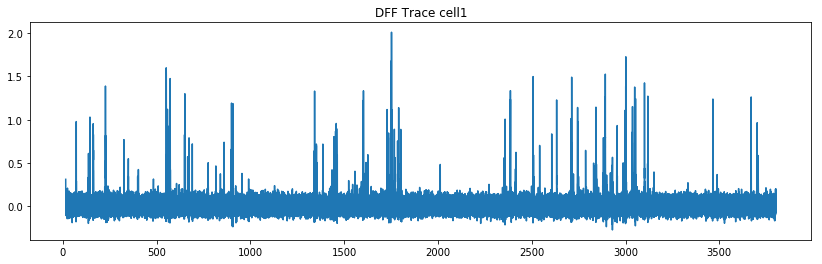

In [63]:
cell_id = experiment_cells_id[56]
time, trace = experiment.get_dff_traces(cell_specimen_ids=[cell_id])
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(14,4))
plt.title("DFF Trace cell1")
plt.plot(time, trace[0])
plt.show()

In [65]:
cell_id = experiment_cells_id[56]
cell_id

517444286

In [67]:
import numpy as np
np.where(experiment_cells_id2 == experiment_cells_id[56])[0][0]


79

In [48]:
import numpy as np
np.where(experiment_cells_id2 == 589162968)[0][0]

54

In [ ]:
trace[0]
len(trace[0])

In [66]:
df = pd.DataFrame(trace[0])
df.to_csv('SIScellula517444286_dep350_exp1.csv',index=False)

In [ ]:
from allensdk.brain_observatory.static_gratings import StaticGratings
data_set = boc.get_ophys_experiment_data(experiment_id)
static_gratings = StaticGratings(data_set)
static_gratings

In [ ]:
stim_table = data_set.get_stimulus_table('static_gratings')
#stim_table = stim_table[(stim_table.temporal_frequency == temporal_frequency) & (stim_table.orientation == orientation)]

stim_table.head()
stim_table.to_csv('SISstatic_grating.csv',index=False)

In [ ]:
stim_table = data_set.get_stimulus_table('natural_scenes')
stim_table.to_csv('SISnatural_scenes.csv',index=False)
stim_table.head()

In [ ]:
stim_table = data_set.get_stimulus_table('natural_movie_one')
stim_table.to_csv('SISnatural_movie_one_1.csv',index=False)

### Cellula 2

In [16]:
import allensdk.brain_observatory.stimulus_info as stim_info

# Find the experiment with the static static gratings stimulus
exp2 = boc.get_ophys_experiments(experiment_container_ids=[experiment_container_id], 
                                stimuli=[stim_info.DRIFTING_GRATINGS])
print("Experiment with drifting gratings:")
pprint.pprint(exp2)

Experiment with drifting gratings:
[{'acquisition_age_days': 84,
  'cre_line': u'Scnn1a-Tg3-Cre',
  'donor_name': u'230570',
  'experiment_container_id': 511510911,
  'fail_eye_tracking': True,
  'id': 508356957,
  'imaging_depth': 350,
  'reporter_line': u'Ai93(TITL-GCaMP6f)',
  'session_type': u'three_session_A',
  'specimen_name': u'Scnn1a-Tg3-Cre;Camk2a-tTA;Ai93-230570',
  'targeted_structure': u'VISp'}]


In [17]:
experiment2 = boc.get_ophys_experiment_data(exp2[0]['id']) 

# print out the metadata available in the NWB file
pprint.pprint(experiment2.get_metadata())

print("\n stimuli available in this file:")
print(experiment2.list_stimuli())

{'age_days': 85,
 'cre_line': u'Scnn1a-Tg3-Cre/wt',
 'device': u'Nikon A1R-MP multiphoton microscope',
 'device_name': u'CAM2P.2',
 'excitation_lambda': u'910 nanometers',
 'experiment_container_id': 511510911,
 'fov': u'400x400 microns (512 x 512 pixels)',
 'genotype': u'Scnn1a-Tg3-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-GCaMP6f)/Ai93(TITL-GCaMP6f)',
 'imaging_depth_um': 350,
 'indicator': u'GCaMP6f',
 'ophys_experiment_id': 508356957,
 'pipeline_version': u'3.0',
 'session_start_time': datetime.datetime(2016, 3, 16, 9, 30, 34),
 'session_type': u'three_session_A',
 'sex': u'female',
 'specimen_name': u'Scnn1a-Tg3-Cre;Camk2a-tTA;Ai93-230570',
 'targeted_structure': u'VISp'}

 stimuli available in this file:
[u'drifting_gratings', u'natural_movie_one', u'natural_movie_three', u'spontaneous']


In [18]:
experiment_id2 = experiment2.get_metadata()['ophys_experiment_id']

In [19]:
# ID delle cellule per questo esperimento
experiment_cells_id2 = experiment2.get_cell_specimen_ids()
len(experiment_cells_id2)

208

In [20]:
import pandas as pd

# Download cells and convert to DataFrame
cells2 = boc.get_cell_specimens()
cells2 = pd.DataFrame.from_records(cells2)
print("total cells: %d" % len(cells2))

total cells: 63251


In [21]:
experiment_cells2 = cells2[cells2['cell_specimen_id'].isin(experiment_cells_id2)]
experiment_cells2.shape

(208, 60)

In [22]:
experiment_cells2.head()

,all_stim,area,cell_specimen_id,donor_full_genotype,dsi_dg,experiment_container_id,failed_experiment_container,g_dsi_dg,g_osi_dg,g_osi_sg,...,specimen_id,tfdi_dg,time_to_peak_ns,time_to_peak_sg,tld1_id,tld1_name,tld2_id,tld2_name,tlr1_id,tlr1_name
3727,False,VISp,517442115,Scnn1a-Tg3-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-GCaM...,0.507242,511510911,False,0.503297,0.754965,NaN,...,501753157,0.405015,NaN,NaN,177837516,Scnn1a-Tg3-Cre,177837320.0,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)
3729,False,VISp,517442127,Scnn1a-Tg3-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-GCaM...,NaN,511510911,False,0.587104,0.316685,0.602346,...,501753157,0.359538,0.29925,NaN,177837516,Scnn1a-Tg3-Cre,177837320.0,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)
3731,False,VISp,517442149,Scnn1a-Tg3-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-GCaM...,0.132268,511510911,False,0.232546,0.873449,NaN,...,501753157,0.345732,NaN,NaN,177837516,Scnn1a-Tg3-Cre,177837320.0,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)
3733,False,VISp,517442166,Scnn1a-Tg3-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-GCaM...,1.710440,511510911,False,0.961830,0.865983,NaN,...,501753157,0.237863,NaN,NaN,177837516,Scnn1a-Tg3-Cre,177837320.0,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)
3734,False,VISp,517442176,Scnn1a-Tg3-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-GCaM...,NaN,511510911,False,1.000000,1.000000,0.145249,...,501753157,0.336402,0.19950,NaN,177837516,Scnn1a-Tg3-Cre,177837320.0,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)


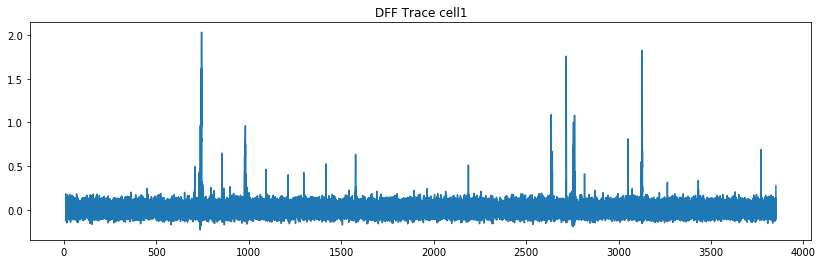

In [68]:
cell_id2 = experiment_cells_id2[79]
time2, trace2 = experiment2.get_dff_traces(cell_specimen_ids=[cell_id2])
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(14,4))
plt.title("DFF Trace cell1")
plt.plot(time2, trace2[0])
plt.show()

In [69]:
cell_id2 = experiment_cells_id2[79]
cell_id2

517444286

In [70]:
df = pd.DataFrame(trace2[0])
df.to_csv('SIScellula517444286_dep350_exp2.csv',index=False)

In [ ]:
from allensdk.brain_observatory.drifting_gratings import DriftingGratings
data_set2 = boc.get_ophys_experiment_data(experiment_id2)
drifting_gratings2 = DriftingGratings(data_set2)
drifting_gratings2

In [ ]:
stim_table2 = data_set2.get_stimulus_table('drifting_gratings')
#stim_table = stim_table[(stim_table.temporal_frequency == temporal_frequency) & (stim_table.orientation == orientation)]

stim_table2.head()
stim_table2.to_csv('SISdrifting_grating.csv',index=False)

In [ ]:
stim_table2 = data_set2.get_stimulus_table('natural_movie_one')
#stim_table = stim_table[(stim_table.temporal_frequency == temporal_frequency) & (stim_table.orientation == orientation)]

stim_table2.head()
stim_table2.to_csv('SISnatural_movie_one2.csv',index=False)

In [ ]:
stim_table2 = data_set2.get_stimulus_table('natural_movie_three')
#stim_table = stim_table[(stim_table.temporal_frequency == temporal_frequency) & (stim_table.orientation == orientation)]

stim_table2.head()
stim_table2.to_csv('SISnatural_movie_three.csv',index=False)